In [1]:
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv
load_dotenv()
groq_api_key=os.getenv('GROQ_API_KEY')
LLM=ChatGroq(model='llama-3.1-8b-instant',api_key=groq_api_key)

c:\Gen-Agent-AI\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
python-dotenv could not parse statement starting at line 2


In [2]:
def add(a:int,b:int)->int:
    '''Adds two integers together.
    Args:
        a (int): The first integer to add.
        b (int): The second integer to add.
        Returns:
        int: The sum of a and b.'''
    return a+b

def subtract(a:int,b:int)->int:
    '''Subtracts the second integer from the first integer.
    Args:
        a (int): The integer to subtract from.
        b (int): The integer to subtract.
        Returns:
        int: The difference of a and b.'''
    return a-b

In [3]:
llm_with_tools=LLM.bind_tools([add,subtract])

In [4]:
#Create state graph
from typing_extensions import TypedDict
from typing import List,Annotated
from langgraph.graph.message import add_messages

class TypeDitcClass(TypedDict):
     messages:Annotated[list,add_messages]

from langgraph.graph import StateGraph
builder=StateGraph(TypeDitcClass)

def llm_tool(state:TypeDitcClass)->str:
    '''A function that takes in a state and returns a string.'''
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

In [5]:
tools=[add]

In [6]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph import START,END

builder.add_node('llm_tool',llm_tool)
builder.add_node('tools',ToolNode(tools))
#Actal flow
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges(
    "llm_tool",
    tools_condition
)
builder.add_edge("llm_tool",END)


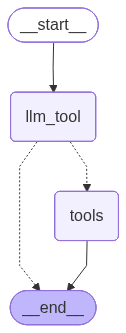

In [7]:
graph_compile=builder.compile()
graph_compile

In [8]:
response=graph_compile.invoke({"messages":"What is 2+2?"})
for message in response['messages']:
    message.pretty_print()

================================ Human Message =================================

What is 2+2?
================================== Ai Message ==================================
Tool Calls:
  add (1h503z6n1)
 Call ID: 1h503z6n1
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4


In [9]:
response=graph_compile.invoke({"messages":"What is 2 substract 3?"})
for message in response['messages']:
    message.pretty_print()

================================ Human Message =================================

What is 2 substract 3?
================================== Ai Message ==================================
Tool Calls:
  subtract (47f5bk5hs)
 Call ID: 47f5bk5hs
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: subtract

Error: subtract is not a valid tool, try one of [add].
